# <center><font color= grey, size=15>EDA - Insaid Telecom</font></center>

---
# **Table of Contents**
---

**1.** [**Company Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Importing Libraries**](#Section3)<br>
**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)
  - **4.2** [**Data Information**](#Section42)

**5.** [**Data Pre-Profiling**](#Section5)<br>
**6.** [**Data Cleaning**](#Section6)<br>
**7.** [**Data Post-Profiling**](#Section7)<br>
**8.** [**Exploratory Data Analysis**](#Section8)<br>
**9.** [**Summarization**](#Section9)<br>
  - **9.1** [**Conclusion**](#Section91)<br>
  - **9.2** [**Actionable Insights**](#Section92)<br>

---
<a name = Section1></a>
# <font color=blue>1. Company Introduction</font>

- <b>InsaidTelecom</b>, one of the leading telecom players, understands that customizing offerings is very important for its business to stay competitive.
- Currently, <b>InsaidTelecom</b> is seeking to leverage behavioural data from more than <b>60%</b> of the <b>50 million mobile devices</b> active daily in India
- They are doing this to help their clients better understand and interact with their audiences.

---
#### <u>Current Scenario</u>
- In this consulting assignment, Insaidians are expected to <b>build a dashboard</b>.
- This dashboard will help us to understand a user's demographic characteristics based on their <b>mobile usage, geolocation, and mobile device properties</b>
- Doing so will help millions of developers and brand advertisers around the world pursue <b>data-driven marketing efforts.</b>
- These efforts are relevant to their users and cater to their preferences.
---

<a name = Section2></a>
# <font color=blue>2. Problem Statement: </font>
#### <u>Team Role :</u>
- To help the customer the consultants are expected to have depth of clarity in the underlying data.
- How much effort has been put into cleansing and purifying the data will decide how closely have you looked at the data..
- How detailed is the observation stated in the submission report and finally, how well a group presents their consulting journey.
- Please remember that this is an analytics consulting firm. Hence, your efforts in terms of finding user behaviour are going to directly impact the company's offerings.
- Do help the company understand what is the right way forward and suggest actionable insights from marketing and product terms.

<a name = Section3></a>
# <font color=blue>3. Importing Libraries:</font>

In [9]:
#pip install PyMySQL

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import pymysql

<a name = Section4></a>
# <font color=blue>4. Data Description</font>
<a name = Section41></a>
### 4.1 <u>Dataset Description</u>
- In this assignment, you are going to study the demographics of a user (gender and age) based on their app download and usage behaviours.
- The Data is collected from mobile apps that use Inside Telecom services. Full recognition and consent from an individual user of those apps have been obtained,
- and appropriate anonymization has been performed to protect privacy. Due to confidentiality, we won't provide details on how the gender and age data were obtained.
- Please treat them as accurate ground truth for prediction.

<b>The data schema can be represented in the following table:</b><p>
<b>gender_age_train</b> - Devices and their respective user gender, age and age_group<br>
<b>phone_brand_device_model</b> - device ids, brand, and models phone_brand: note that few brands are in Chinese

|Brand Name|Brand English Mapping|
|:--|:--|
|'华为'|'Huawei'|
|'小米'|'Xiaomi'|
|'三星'|'Samsung'|
|'vivo'|'vivo'|
|'OPPO'|'OPPO'|
|'魅族'|'Meizu'|
|'酷派'|'Coolpad'|
|'乐视'|'LeEco'|
|'联想 '|'Lenovo'|
|'HTC'|'HTC'|
<p>
<b>Events_data:</b>
- When a user uses mobile on an INSAID Telecom network, the event gets logged in this data.
- Each event has an event id, location (lat/long), and the event corresponds to the frequency of mobile usage. timestamp: when the user is using the mobile.

<a name = Section42></a>
### 4.2 <u> Data Information</u>

### <p style='text-align: center; color:blue'>Importing events_data.csv

In [11]:
#pd.set_option('display.float_format', lambda x: '%.f' % x)
events_df = pd.read_csv(r'C:\Users\Mahesh\Downloads\Python\Capstone Projects\New folder\events_data.csv')
events_df.head(10)

,event_id,device_id,timestamp,longitude,latitude,city,state
0,2765368,2.973348e+18,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi
1,2955066,4.734221e+18,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal
2,605968,-3.264500e+18,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi
3,448114,5.731369e+18,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu
4,665740,3.388880e+17,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand
5,1078723,-5.124242e+17,2016-05-02 02:21:20,83.398244,17.768149,Visakhapatnam,AndhraPradesh
6,2948755,5.536513e+18,2016-05-03 16:20:14,80.359796,13.128174,Chennai,TamilNadu
7,280014,-8.879644e+18,2016-05-05 13:06:01,78.155397,16.390327,Wanparti,AndhraPradesh
8,2309828,3.020769e+18,2016-05-04 09:24:50,77.263922,28.757914,Delhi,Delhi
9,720049,4.928556e+18,2016-05-06 19:00:52,72.844795,18.974929,Mumbai,Maharashtra


### <p style='text-align: center; color:blue'>Importing gender_age_train.csv and phone_brand_device_model.csv by coonecting to SQL server

In [12]:
#Connect to database
# connection=pymysql.connect(host='cpanel.insaid.co',
#                     user='student',
#                     password='student',
#                     database='Capstone1'
#                    )
# cursor=connection.cursor()

# query1= 'select * from gender_age_train'
# query2= 'select * from phone_brand_device_model'

In [13]:
#gender_df=pd.read_sql_query(query1,connection)
#gender_df.to_csv('gender_age_train.csv', index=False)
gender_df=pd.read_csv(r'C:\Users\Mahesh\Downloads\Python\Capstone Projects\New folder\gender_age_train.csv')
gender_df.head()

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [14]:
#brand_df=pd.read_sql_query(query2,connection)
#brand_df.to_csv('phone_brand_device_model.csv', index=False)
brand_df=pd.read_csv(r'C:\Users\Mahesh\Downloads\Python\Capstone Projects\New folder\phone_brand_device_model.csv')
brand_df.head()

,device_id,phone_brand,device_model
0,1877775838486905855,vivo,Y13
1,-3766087376657242966,小米,V183
2,-6238937574958215831,OPPO,R7s
3,8973197758510677470,三星,A368t
4,-2015528097870762664,小米,红米Note2


<a name = Section5></a>
# <font color=blue>5. Data Pre-profilling</font>
## Data Pre-profilling for events_df

In [15]:
events_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 7 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   event_id   3252950 non-null  int64  
 1   device_id  3252497 non-null  float64
 2   timestamp  3252950 non-null  object 
 3   longitude  3252527 non-null  float64
 4   latitude   3252527 non-null  float64
 5   city       3252950 non-null  object 
 6   state      3252573 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 173.7+ MB


In [16]:
pd.set_option('display.float_format', lambda x: '%.f' % x)
new_eventsdf=events_df[~events_df.device_id.duplicated()]
new_eventsdf

,event_id,device_id,timestamp,longitude,latitude,city,state
0,2765368,2973347786994914304,2016-05-07 22:52:05,77,29,Delhi,Delhi
1,2955066,4734221357723754496,2016-05-01 20:44:16,88,23,Calcutta,WestBengal
2,605968,-3264499652692492800,2016-05-02 14:23:04,77,29,Delhi,Delhi
3,448114,5731369272434022400,2016-05-03 13:21:16,80,13,Chennai,TamilNadu
4,665740,338888002570799936,2016-05-06 03:51:05,86,24,Bokaro,Jharkhand
...,...,...,...,...,...,...,...
3251857,2437377,-4114378901988743680,2016-05-06 21:19:09,80,13,Chennai,TamilNadu
3252013,69286,319472832935756160,2016-05-03 06:39:47,73,19,Mumbai,Maharashtra
3252525,602171,3294038162638434816,2016-05-03 11:16:30,78,13,Bangalore,Karnataka
3252794,2170713,5838483526065661952,2016-05-07 22:18:57,76,27,Daosa,Rajasthan


In [17]:
new_eventsdf[new_eventsdf['device_id']==-8076087639492063270]

,event_id,device_id,timestamp,longitude,latitude,city,state
1773216,2341008,-8076087639492063232,2016-05-01 15:18:43,76,11,Kozhikkod,Kerala


In [18]:
events_df.describe()

,event_id,device_id,longitude,latitude
count,3252950,3252497,3252527,3252527
mean,1626476,101220009585530976,78,22
std,939046,5316758188197051392,4,6
min,1,-9222956879900150784,13,8
25%,813238,-4540611333857475072,76,18
50%,1626476,172682011159278816,77,22
75%,2439713,4861813234983622656,80,29
max,3252950,9222849349208140800,95,42


In [19]:
events_df.isnull().sum()

event_id       0
device_id    453
timestamp      0
longitude    423
latitude     423
city           0
state        377
dtype: int64

### <font color=red>Obervations in Events_df:</font>
<font color=green>
- There are 453 missing values in device_id                .<br>
- There are 423 missing values in longitude & latitude each.<br>
- There are 377 missing values in state                    .<br>
- Data type seems fine                                     .

## Data Pre-profilling for gender_df

In [20]:
gender_df.head()

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [21]:
gender_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   device_id  74645 non-null  int64 
 1   gender     74645 non-null  object
 2   age        74645 non-null  int64 
 3   group      74645 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [22]:
gender_df[gender_df.device_id.duplicated()]

,device_id,gender,age,group


In [23]:
gender_df.describe()

,device_id,age
count,74645,74645
mean,-749135388419928,31
std,5327149733911456768,10
min,-9223067244542181376,1
25%,-4617366812584264704,25
50%,-18413620249632024,29
75%,4636655899093149696,36
max,9222849349208140800,96


### <font color=red>Obervations in gender_df:</font>
<font color=green>
- There are no missing values in device_id<br>
- Data type seems fine (device_id is Int type)<br>
- Minimum age is 1 year & Maximum age is 96 Years<br></font>

## Data Pre-profilling for brand_df

In [24]:
brand_df.head()

,device_id,phone_brand,device_model
0,1877775838486905855,vivo,Y13
1,-3766087376657242966,小米,V183
2,-6238937574958215831,OPPO,R7s
3,8973197758510677470,三星,A368t
4,-2015528097870762664,小米,红米Note2


In [25]:
brand_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   device_id     87726 non-null  int64 
 1   phone_brand   87726 non-null  object
 2   device_model  87726 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


In [26]:
brand_df.describe()

,device_id
count,87726
mean,-5212556568047386
std,5330156982713820160
min,-9223321966609553408
25%,-4623331173682123776
50%,-31098020763804488
75%,4635193992006549504
max,9222849349208140800


### <font color=red>Obervations in brand_df:</font>
<font color=green>
- There are no missing values.<br>
- Data type seems fine (device_id is Int type).

<a name = Section6></a>
# <font color=blue>6. Data cleaning</font>
##  Data Cleaning for evets_df

In [27]:
# to Check for missing values in device_id of event_df

events_df[events_df['device_id'].isna()]

,event_id,device_id,timestamp,longitude,latitude,city,state
2055,1936567,NaN,2016-05-02 15:27:54,76,23,Indore,MadhyaPradesh
26367,2659282,NaN,2016-05-04 14:06:24,76,27,Jaipur,Rajasthan
42088,442198,NaN,2016-05-06 09:27:37,76,27,Jaipur,Rajasthan
43061,1903648,NaN,2016-05-02 15:41:54,76,23,Indore,MadhyaPradesh
44823,3227383,NaN,2016-05-05 08:37:09,76,32,Hoshiarpur,Punjab
...,...,...,...,...,...,...,...
3212337,2191286,NaN,2016-05-04 18:16:06,83,18,Visakhapatnam,AndhraPradesh
3215120,572054,NaN,2016-05-07 08:48:22,83,18,Visakhapatnam,AndhraPradesh
3230115,332451,NaN,2016-05-07 09:01:45,76,32,Hoshiarpur,Punjab
3235494,2534073,NaN,2016-05-06 21:07:01,83,18,Visakhapatnam,AndhraPradesh


In [28]:
# fill the missing values with mendian of device_id in device_id of events_df

events_df['device_id'] = np.where(events_df['device_id'].isna(), events_df['device_id'].median(), events_df['device_id'])

In [29]:
# re-check for missing values in device_id of events_df

events_df.isnull().sum()

event_id       0
device_id      0
timestamp      0
longitude    423
latitude     423
city           0
state        377
dtype: int64

In [30]:
# check missing values in state

events_df[events_df['state'].isna()]

,event_id,device_id,timestamp,longitude,latitude,city,state
2931,706554,-5829328361235250176,2016-05-05 16:58:46,74,19,Pune,NaN
16243,1918653,3137053756433768448,2016-05-03 00:46:10,83,18,Visakhapatnam,NaN
26956,1068940,-1752057305775059712,2016-05-04 16:09:17,76,23,Indore,NaN
30889,2164200,-394582654031064128,2016-05-04 19:33:09,83,18,Visakhapatnam,NaN
32685,460124,5536513450525271040,2016-05-01 21:30:10,80,13,Chennai,NaN
...,...,...,...,...,...,...,...
3210326,1070365,-5858653205052383232,2016-05-07 17:03:06,89,25,Gangarampur,NaN
3226848,145171,4620270824872937472,2016-05-07 20:38:45,88,23,Arambagh,NaN
3235317,210361,-8340098378141155328,2016-05-05 20:53:20,77,29,Delhi,NaN
3236931,2738361,4113023436861671424,2016-05-02 18:15:04,76,23,Indore,NaN


In [31]:
# fill missing values of states in events_df

events_df['state']=np.where(events_df['city']=='Pune', events_df['state'][events_df['city']=='Pune'].unique()[0], events_df['state'])
events_df['state']=np.where(events_df['city']=='Visakhapatnam', events_df['state'][events_df['city']=='Visakhapatnam'].unique()[0], events_df['state'])
events_df['state']=np.where(events_df['city']=='Indore', events_df['state'][events_df['city']=='Indore'].unique()[0], events_df['state'])
events_df['state']=np.where(events_df['city']=='Chennai', events_df['state'][events_df['city']=='Chennai'].unique()[0], events_df['state'])
events_df['state']=np.where(events_df['city']=='Delhi', events_df['state'][events_df['city']=='Delhi'].unique()[0], events_df['state'])
events_df['state']=np.where(events_df['city']=='Channapatna', events_df['state'][events_df['city']=='Channapatna'].unique()[0], events_df['state'])
events_df['state']=np.where(events_df['city']=='Jaipur', events_df['state'][events_df['city']=='Jaipur'].unique()[0], events_df['state'])
events_df['state']=np.where(events_df['city']=='Gangarampur', events_df['state'][events_df['city']=='Gangarampur'].unique()[0], events_df['state'])
events_df['state']=np.where(events_df['city']=='Arambagh', events_df['state'][events_df['city']=='Arambagh'].unique()[0], events_df['state'])

In [32]:
# re-check for missing values in state of events_df

events_df.isnull().sum()

event_id       0
device_id      0
timestamp      0
longitude    423
latitude     423
city           0
state          0
dtype: int64

In [33]:
# check for missing values in longitude & latitudes

events_df[events_df['longitude'].isna()]

,event_id,device_id,timestamp,longitude,latitude,city,state
8015,2929521,1779631023439405312,2016-05-05 01:15:22,NaN,NaN,Delhi,Delhi
9697,1017749,-8790560034584249344,2016-05-03 17:22:52,NaN,NaN,Indore,MadhyaPradesh
10949,2132415,4865606571395668992,2016-05-07 19:57:06,NaN,NaN,Visakhapatnam,AndhraPradesh
16038,926804,7983871429718484992,2016-05-03 12:29:47,NaN,NaN,Chennai,TamilNadu
20586,3074782,-7364840628879980544,2016-05-04 19:39:28,NaN,NaN,Pune,Maharashtra
...,...,...,...,...,...,...,...
3226082,1955966,6774071338248978432,2016-05-06 01:10:38,NaN,NaN,Moga,Punjab
3240057,2318768,1779631023439405312,2016-05-06 09:22:44,NaN,NaN,Delhi,Delhi
3240304,2387314,-7364840628879980544,2016-05-05 06:20:46,NaN,NaN,Pune,Maharashtra
3246545,2857050,4580179444377397760,2016-05-07 14:25:41,NaN,NaN,Jaipur,Rajasthan


### <font color=red>Obervations:</font>
<font color=green>It seem that both longitude & latitude are missing for same index

In [34]:
# pd.crosstab(index=events_df['city'], columns=events_df['state'])

In [35]:
# check for unique cities for which longitude & latitude are missing

temp=events_df[events_df['longitude'].isna()]
temp.city.unique()

array(['Delhi', 'Indore', 'Visakhapatnam', 'Chennai', 'Pune', 'Jaipur',
       'Araria', 'Moga', 'Bagaha'], dtype=object)

In [36]:
# check for the longitude unique value for Delhi

events_df['longitude'][events_df['city']=='Delhi'].unique()

array([77.225676, 77.256809, 77.263922, ..., 77.298262, 77.261549,
       77.229074])

In [37]:
events_df['longitude'][events_df['city']=='Delhi'].unique()[0]

77.22567599999998

In [38]:
# using above mentod we can replace all the missing values of longitude & latitude

events_df['longitude']=np.where(events_df['city']=='Pune', events_df['longitude'][events_df['city']=='Pune'].unique()[0], events_df['longitude'])
events_df['longitude']=np.where(events_df['city']=='Visakhapatnam', events_df['longitude'][events_df['city']=='Visakhapatnam'].unique()[0], events_df['longitude'])
events_df['longitude']=np.where(events_df['city']=='Indore', events_df['longitude'][events_df['city']=='Indore'].unique()[0], events_df['longitude'])
events_df['longitude']=np.where(events_df['city']=='Chennai', events_df['longitude'][events_df['city']=='Chennai'].unique()[0], events_df['longitude'])
events_df['longitude']=np.where(events_df['city']=='Delhi', events_df['longitude'][events_df['city']=='Delhi'].unique()[0], events_df['longitude'])
events_df['longitude']=np.where(events_df['city']=='Bagaha', events_df['longitude'][events_df['city']=='Bagaha'].unique()[0], events_df['longitude'])
events_df['longitude']=np.where(events_df['city']=='Jaipur', events_df['longitude'][events_df['city']=='Jaipur'].unique()[0], events_df['longitude'])
events_df['longitude']=np.where(events_df['city']=='Araria', events_df['longitude'][events_df['city']=='Araria'].unique()[0], events_df['longitude'])
events_df['longitude']=np.where(events_df['city']=='Moga', events_df['longitude'][events_df['city']=='Moga'].unique()[0], events_df['longitude'])

events_df['latitude']=np.where(events_df['city']=='Pune', events_df['latitude'][events_df['city']=='Pune'].unique()[0], events_df['latitude'])
events_df['latitude']=np.where(events_df['city']=='Visakhapatnam', events_df['latitude'][events_df['city']=='Visakhapatnam'].unique()[0], events_df['latitude'])
events_df['latitude']=np.where(events_df['city']=='Indore', events_df['latitude'][events_df['city']=='Indore'].unique()[0], events_df['latitude'])
events_df['latitude']=np.where(events_df['city']=='Chennai', events_df['latitude'][events_df['city']=='Chennai'].unique()[0], events_df['latitude'])
events_df['latitude']=np.where(events_df['city']=='Delhi', events_df['latitude'][events_df['city']=='Delhi'].unique()[0], events_df['latitude'])
events_df['latitude']=np.where(events_df['city']=='Bagaha', events_df['latitude'][events_df['city']=='Bagaha'].unique()[0], events_df['latitude'])
events_df['latitude']=np.where(events_df['city']=='Jaipur', events_df['latitude'][events_df['city']=='Jaipur'].unique()[0], events_df['latitude'])
events_df['latitude']=np.where(events_df['city']=='Araria', events_df['latitude'][events_df['city']=='Araria'].unique()[0], events_df['latitude'])
events_df['latitude']=np.where(events_df['city']=='Moga', events_df['latitude'][events_df['city']=='Moga'].unique()[0], events_df['latitude'])

In [39]:
# finally check for any missing values in events_df

events_df.isnull().sum()

event_id     0
device_id    0
timestamp    0
longitude    0
latitude     0
city         0
state        0
dtype: int64

### <font color=red>Obervations:</font>
<font color=green>
There are no missing values now in events_df</p>

### <p style='text-align: center; color:blue'> check for any abnormal values in Longitude & Latitude

In [40]:
# pd.set_option('display.duplicated_format', lambda x: '%.6f' % x)
# eevents_df=events_df
# eevents_df

In [43]:
#pip install folium

Defaulting to user installation because normal site-packages is not writeable
     ------------------------------------ 102.3/102.3 kB 420.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [44]:
import folium
from folium import Map, Marker
import webbrowser

In [45]:
# check unique values in each column

events_df.nunique()

event_id     3252950
device_id      60865
timestamp     588126
longitude      46403
latitude       46480
city             933
state             32
dtype: int64

In [46]:
# m = folium.Map(location=[unique_location['latitude'][0], unique_location['longitude'][0]])

# for i, unique_location in unique_location.iterrows():
#     popup=folium.Popup(unique_location['city'], max_width=1000)
#     folium.Marker(location=[unique_location['latitude'],unique_location['longitude']],
#                  popup=popup, icon=folium.Icon(icon="info-sign")).add_to(m)
# m
# m.save("map.html")
# webbrowser.open("map.html")

In [47]:
# unique_location.groupby(['longitude', 'latitude'])['city'].count()

In [48]:
# check unique cities

events_df['city'].unique()

array(['Delhi', 'Calcutta', 'Chennai', 'Bokaro', 'Visakhapatnam',
       'Wanparti', 'Mumbai', 'Pune', 'Gandhidham', 'Thalassery', 'Pusad',
       'Anjangaon', 'Indore', 'Paramakkudi', 'ChikBallapur',
       'Gopichettipalaiyam', 'Nashik', 'Basmat', 'Jaipur',
       'Virappanchatram', 'Sunabeda', 'Fazilka', 'Aonla', 'Adoni',
       'Kohima', 'Moga', 'Jagadhri', 'Kuniyamuthur', 'Virudhachalam',
       'Thuthukkudi', 'Sendhwa', 'Bangalore', 'Hyderabad', 'Bodhan',
       'Tilhar', 'Maheshtala', 'Akola', 'BallyCantonment', 'Mubarakpur',
       'Khandwa', 'KanpurCantonment', 'JabalpurCantonment', 'Budaun',
       'Lohardaga', 'Halisahar', 'Jangipur', 'Rajapalaiyam', 'Wardha',
       'Beypur', 'Sattenapalle', 'Kavundampalaiyam', 'Salem',
       'Chalisgaon', 'Navghar', 'Pilibhit', 'Aurangabad', 'Allahabad',
       'Chomun', 'Raiganj', 'Jamshedpur', 'Vrindavan', 'Kottagudem',
       'Jalaun', 'Dimapur', 'Karanja', 'Khammam', 'Wadhwan',
       'Basavakalyan', 'Bari', 'Miryalaguda', 'Rajnandgao

In [49]:
# check unique states

events_df['state'].unique()

array(['Delhi', 'WestBengal', 'TamilNadu', 'Jharkhand', 'AndhraPradesh',
       'Maharashtra', 'Gujarat', 'Kerala', 'MadhyaPradesh', 'Karnataka',
       'Rajasthan', 'Orissa', 'Punjab', 'UttarPradesh', 'Nagaland',
       'Haryana', 'Telangana', 'Chhattisgarh', 'Bihar', 'JammuandKashmir',
       'Assam', 'Goa', 'Mizoram', 'Tripura', 'Uttaranchal', 'Pondicherry',
       'Manipur', 'Meghalaya', 'ArunachalPradesh', 'HimachalPradesh',
       'Chandigarh', 'AndamanandNicobarIslands'], dtype=object)

In [50]:
# check duplicate values in city & state

events_df[events_df.duplicated(['city','state'])]

,event_id,device_id,timestamp,longitude,latitude,city,state
2,605968,-3264499652692492800,2016-05-02 14:23:04,77,29,Delhi,Delhi
6,2948755,5536513450525271040,2016-05-03 16:20:14,80,13,Chennai,TamilNadu
8,2309828,3020769016382465536,2016-05-04 09:24:50,77,29,Delhi,Delhi
10,3219828,-3433061233631405568,2016-05-03 00:27:21,80,13,Chennai,TamilNadu
12,2334601,-601883305299256832,2016-05-05 11:17:48,83,18,Visakhapatnam,AndhraPradesh
...,...,...,...,...,...,...,...
3252945,2687452,-1937027962234299136,2016-05-07 23:33:14,74,19,Pune,Maharashtra
3252946,1051580,3345850694879477248,2016-05-03 05:13:30,73,19,Mumbai,Maharashtra
3252947,1316227,-6406040271586684928,2016-05-01 16:03:28,77,29,Delhi,Delhi
3252948,381262,-2920741109167081472,2016-05-05 17:22:36,83,18,Visakhapatnam,AndhraPradesh


In [51]:
# filter unique values from above duplicate values

events_df[~events_df.duplicated(['city','state'])]

,event_id,device_id,timestamp,longitude,latitude,city,state
0,2765368,2973347786994914304,2016-05-07 22:52:05,77,29,Delhi,Delhi
1,2955066,4734221357723754496,2016-05-01 20:44:16,88,23,Calcutta,WestBengal
3,448114,5731369272434022400,2016-05-03 13:21:16,80,13,Chennai,TamilNadu
4,665740,338888002570799936,2016-05-06 03:51:05,86,24,Bokaro,Jharkhand
5,1078723,-512424213979236416,2016-05-02 02:21:20,83,18,Visakhapatnam,AndhraPradesh
...,...,...,...,...,...,...,...
24765,1652345,-8078315480586580992,2016-05-04 17:43:27,78,10,TheniAllinagaram,TamilNadu
30665,2250464,4333377645221841408,2016-05-02 22:09:02,82,17,Tadepallegudem,AndhraPradesh
31978,1155628,5135547808784488448,2016-05-02 18:36:52,75,20,Kopargaon,Maharashtra
32442,1702689,-2205710624094222080,2016-05-04 01:46:39,76,13,Chikmagalur,Karnataka


### <font color=red>Obervations:</font>
<font color=green>
It seem that there is difference in city count of 10 whereas unique cities are only 933 but from above in above it showing 943

In [52]:
# assign these 943 a variable as Nevents_df

Nevents_df=events_df[~events_df.duplicated(['city','state'])]

In [53]:
# check again duplicate values for city in above filtered dataset 

Nevents_df[Nevents_df.duplicated(['city'])]

,event_id,device_id,timestamp,longitude,latitude,city,state
3039,3052760,-2313307084474974720,2016-05-05 04:08:31,79,17,Hyderabad,AndhraPradesh
3046,2402990,1137069970437401216,2016-05-02 15:59:11,88,23,Shrirampur,WestBengal
3152,3179708,4812357384014492672,2016-05-02 19:51:30,78,28,Sikandarabad,UttarPradesh
7566,2785078,8415235337563516928,2016-05-04 18:43:56,81,26,Fatehpur,UttarPradesh
8301,2924790,4858543109978340352,2016-05-02 22:27:35,76,14,Bhadravati,Karnataka
8693,698882,-1070081181743286400,2016-05-01 06:20:01,84,25,Aurangabad,Bihar
10768,3205539,6721289422023657472,2016-05-06 19:21:09,94,27,Lakhimpur,Assam
11649,2201774,874676351336566400,2016-05-07 04:16:00,75,14,Sagar,Karnataka
12356,2320699,2511298857415229440,2016-05-02 10:01:17,76,23,Mau,MadhyaPradesh
16041,961526,-7174817548339415040,2016-05-06 15:49:12,80,28,Shahabad,UttarPradesh


### <font color=red>Obervations:</font>
<font color=green>
we have Found those 10 unique city which diffres from others.

In [54]:
#assign varibale to thses unique 10 cities

wrong_cordinates = Nevents_df[Nevents_df.duplicated(['city'])]

In [55]:
events_df[events_df['city']=='Shrirampur'].sample(10).sort_values('state')

,event_id,device_id,timestamp,longitude,latitude,city,state
2175439,721642,-8135692766238588928,2016-05-04 20:06:29,75,20,Shrirampur,Maharashtra
1332689,1132193,8222061587611287552,2016-05-04 00:35:52,75,20,Shrirampur,Maharashtra
2279988,2593431,-4788517115285139456,2016-05-07 18:14:40,75,20,Shrirampur,Maharashtra
1833887,272565,8222061587611287552,2016-05-04 08:33:50,75,20,Shrirampur,Maharashtra
2805838,2099195,-4788517115285139456,2016-05-03 00:17:59,75,20,Shrirampur,Maharashtra
789896,1457996,2290392185268630272,2016-05-02 18:56:52,75,20,Shrirampur,Maharashtra
2288530,484329,5336563395612712960,2016-05-06 08:18:41,75,20,Shrirampur,Maharashtra
2373639,3066146,-7849429222038594560,2016-05-04 13:28:16,88,23,Shrirampur,WestBengal
189285,1927084,-4022930662330815488,2016-05-02 09:04:48,88,23,Shrirampur,WestBengal
3244005,2710826,-2503031617973078528,2016-05-05 22:45:26,88,23,Shrirampur,WestBengal


In [56]:
# plot all these 10 cities on map using folium

wr_c = folium.Map(location=[wrong_cordinates['latitude'][3039], wrong_cordinates['longitude'][3039]], zoom_start=5)

for i, wrong_cordinates in wrong_cordinates.iterrows():
    popup=folium.Popup(wrong_cordinates['city'], max_width=1000)
    folium.Marker(location=[wrong_cordinates['latitude'],wrong_cordinates['longitude']],
                 popup=popup, icon=folium.Icon(icon="info-sign")).add_to(wr_c)
wr_c

### <font color=red>Obervations:</font>
<font color=green>
for Index- 3039  : State is wrong, as per map it is <b>Telangana</b><br> 
for Index- 3046  : <b>Shrirampur </b>is in <u>Maharashtra </u> as well as in <u>West Bengal</u> states<br>
for Index- 3152  : <b>Sikandarabad </b>is in <u>Andhrapradesh </u> as well as in <u>UttarPradesh</u> states<br>
for Index- 7566  : <b>Fatehpur </b>is in <u>Rajashtahn </u> as well as in <u>UttarPradesh</u> states<br>
for Index- 8301  : <b>Bhadravati </b>is in <u>Maharashtra </u> as well as in <u>Karnataka</u> states<br>
for Index- 8693  : <b>Aurangabad </b>is in <u>Maharashtra </u> as well as in <u>Bihar</u> states<br>
for Index- 10768 : <b>Lakhimpur </b>is in <u>Assam</u> as well as in <u>Uttarprdesh</u> states<br>
for Index- 11649 : <b>Sagar </b>is in <u>Karnataka </u> as well as in <u>MadhyaPradesh</u> states<br>
for Index- 12356 : <b>Mau </b>is in <u>Madhyapradesh</u> as well as in <u>Uttarprdesh</u> states<br>
for Index- 16041 : <b>Shahabad </b>is in <u>Karnataka</u> as well as in <u>Uttarprdesh</u> states<br>

In [57]:
# replace corrected State for Hyderabad

events_df['state']=np.where((events_df['city']=='Hyderabad') & (events_df['state']=='AndhraPradesh'), events_df['state'][events_df['city']=='Hyderabad'].unique()[0], events_df['state'])

<a name = Section7></a>
# <font color=blue>7. Data Post-profiling</font>

In [58]:
events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   event_id   int64  
 1   device_id  float64
 2   timestamp  object 
 3   longitude  float64
 4   latitude   float64
 5   city       object 
 6   state      object 
dtypes: float64(3), int64(1), object(3)
memory usage: 173.7+ MB


In [59]:
gender_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   device_id  74645 non-null  int64 
 1   gender     74645 non-null  object
 2   age        74645 non-null  int64 
 3   group      74645 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [60]:
brand_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   device_id     87726 non-null  int64 
 1   phone_brand   87726 non-null  object
 2   device_model  87726 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


<a name = Section8></a>
# <font color=blue>8. Exploratory Data Analysis:</font>

<font color=purple>
Note: While doing analysis for the above points, consider only one instance of a particular User(device_id) as a User can do multiple phone calls and considering every instance of the same User can give misleading numbers.

### <p style='text-align: center; color:blue'>1. Distribution of Users(device_id) across States.

In [61]:
deviceID_across_state=events_df[~events_df.duplicated(['device_id','state'])]
# deviceID_across_state.sort_values('state')
unique_deviceID_across_state=deviceID_across_state[~deviceID_across_state.duplicated(['device_id'])].sort_values('state')
unique_deviceID_across_state

,event_id,device_id,timestamp,longitude,latitude,city,state
1964810,1650093,1120514292296380544,2016-05-07 15:20:34,93,12,PortBlair,AndamanandNicobarIslands
116371,1983680,-2343254225885056512,2016-05-07 06:12:07,93,12,PortBlair,AndamanandNicobarIslands
28310,356534,-683013883336350336,2016-05-03 13:34:19,93,12,PortBlair,AndamanandNicobarIslands
501817,1365726,1409175133670589952,2016-05-06 10:40:06,93,12,PortBlair,AndamanandNicobarIslands
86780,152050,8788237160115262464,2016-05-02 14:17:21,93,12,PortBlair,AndamanandNicobarIslands
...,...,...,...,...,...,...,...
229904,2331193,-1619571534762447104,2016-05-02 10:33:27,88,23,Calcutta,WestBengal
23559,458563,5148644577291928576,2016-05-04 19:31:46,87,23,Bankura,WestBengal
229815,1755987,2224931372823125248,2016-05-02 20:38:58,88,23,Calcutta,WestBengal
222764,371623,5112878913108245504,2016-05-05 09:18:40,88,23,Barddhaman,WestBengal


In [62]:
distribution_of_Users_across_state=unique_deviceID_across_state.groupby(['state'])['device_id'].count().sort_values(ascending=False)
distribution_of_Users_across_state

state
Maharashtra                 9009
WestBengal                  7436
Karnataka                   6481
TamilNadu                   5770
Delhi                       4909
AndhraPradesh               4896
UttarPradesh                3660
MadhyaPradesh               3221
Rajasthan                   3093
Telangana                   3078
Gujarat                     1749
Bihar                       1372
Punjab                      1055
Kerala                       939
Haryana                      816
Jharkhand                    739
Orissa                       655
Assam                        483
Chhattisgarh                 400
Uttaranchal                  258
JammuandKashmir              236
Nagaland                     107
Pondicherry                   96
Goa                           76
Mizoram                       70
Meghalaya                     56
AndamanandNicobarIslands      41
Tripura                       36
Chandigarh                    35
ArunachalPradesh              32
Hima

<AxesSubplot: title={'center': 'Distribution of users across States'}, xlabel='state', ylabel='Count of Device_ID'>

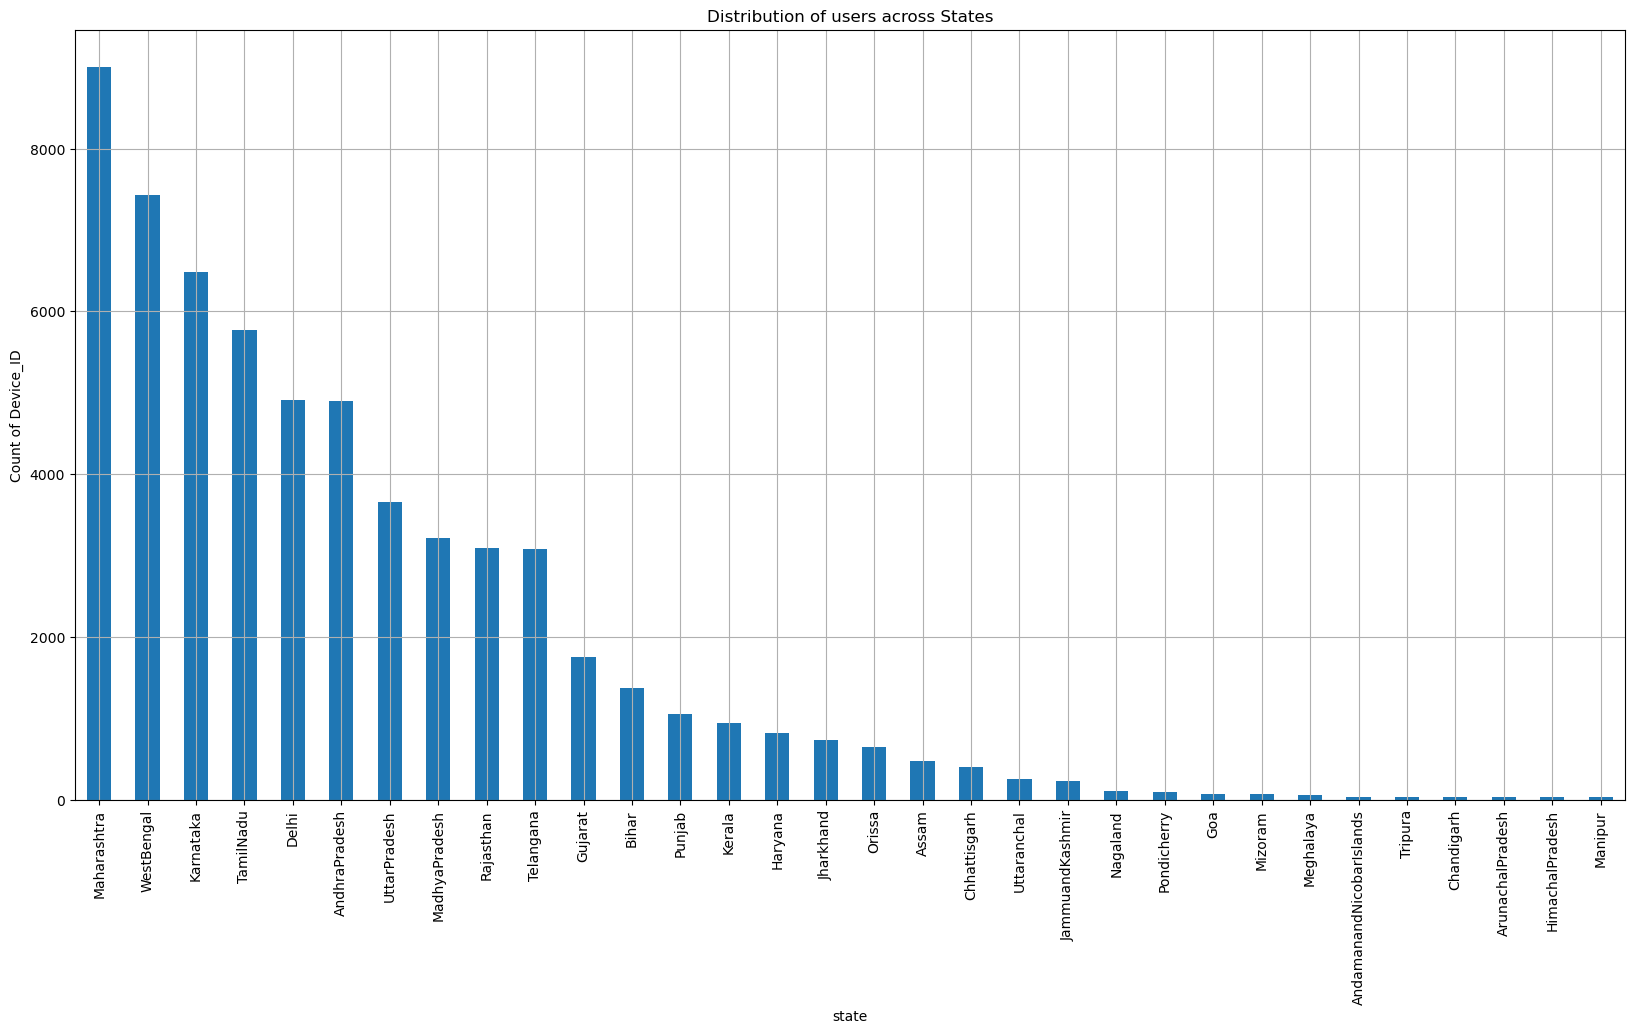

In [63]:
plt.figure(figsize=(20,10))
distribution_of_Users_across_state.plot(kind='bar', ylabel=('Count of Device_ID'),
                                        title='Distribution of users across States',
                                       grid= True)

### <font color=red>Obervations:</font>
<font color=green>
Most of the Users are from <b>Maharashtra</b>

### <p style='text-align: center; color:blue'> 2. Distribution of Users across Phone Brands(Consider only 10 Most used Phone Brands).

In [64]:
brand_df[brand_df.duplicated(['device_id'])]

,device_id,phone_brand,device_model


### <font color=red>Obervations:</font>
<font color=green>
There are no duplicate users</b>

In [65]:
brand_df.sample(10)

,device_id,phone_brand,device_model
35111,4667230641857990177,魅族,MX3
84202,1166559176716980802,vivo,X5V
36440,5427782121326372407,三星,S7568
25094,2141121380341345146,OPPO,R7
44629,-3740674776278276085,小米,红米1S
59183,-7097683718165791195,vivo,Y13
4708,6070286429280137487,三星,乐檬K3
79897,-7650498305385274908,华为,荣耀6
36297,9109111207727642492,波导,LT01
69247,4919574547499008398,三星,Galaxy On5


In [66]:
# Reaplce all chinese words with English

brand_df['phone_brand']=np.where(brand_df['phone_brand']=='小米', 'Xiaomi', brand_df['phone_brand'])
brand_df['phone_brand']=np.where(brand_df['phone_brand']=='三星', 'Samsung', brand_df['phone_brand'])
brand_df['phone_brand']=np.where(brand_df['phone_brand']=='华为', 'Huawei', brand_df['phone_brand'])
brand_df['phone_brand']=np.where(brand_df['phone_brand']=='魅族', 'Meizu', brand_df['phone_brand'])
brand_df['phone_brand']=np.where(brand_df['phone_brand']=='酷派', 'Coolpad', brand_df['phone_brand'])
brand_df['phone_brand']=np.where(brand_df['phone_brand']=='联想', 'Lenovo', brand_df['phone_brand'])
brand_df['phone_brand']=np.where(brand_df['phone_brand']=='乐视', 'LeEco', brand_df['phone_brand'])

In [67]:
brand_df.sample(10)

,device_id,phone_brand,device_model
22044,8812952496402296813,vivo,Y11IT
17590,6732954991443080507,Samsung,Galaxy S3
83809,-8032971031278363257,美图,M4
45834,-2613770690140006749,Huawei,荣耀3X畅玩版
57722,6768168877850985267,Huawei,荣耀3C
12015,2418363515297677758,Huawei,荣耀畅玩4X
29899,1287210825684356074,Xiaomi,红米note
32423,-859649164820110745,Xiaomi,红米2
43740,7116711520855053262,Xiaomi,小米note
82058,-3357429859221668991,Samsung,Galaxy S3


In [68]:
brand_df[brand_df['phone_brand']=='联想']

,device_id,phone_brand,device_model


In [69]:
brand_df[brand_df['phone_brand']=='联想 ']

,device_id,phone_brand,device_model
14,7702755134578190493,联想,星星1号
328,-64983638317365633,联想,Q507T
503,-8301731093485295195,联想,V5 Max
642,-2496705891799683947,联想,U960E
647,-6835921906322850841,联想,Grand X
...,...,...,...
87217,-8855083362896552031,联想,U807
87358,4727442495768629137,联想,Q505T
87519,2311373751417173670,联想,V5S
87566,8086020744511382591,联想,U930HD


### <font color=red>Obervations:</font>
<font color=green>
There is a space in <b>联想</b> brand

In [70]:
# Reaplce '联想' chinese word with English 'Lenovo'

brand_df['phone_brand']=np.where(brand_df['phone_brand']=='联想 ', 'Lenovo', brand_df['phone_brand'])

In [71]:
brand_df.sample(10).sort_values(by='phone_brand')

,device_id,phone_brand,device_model
44890,-1753688547113467500,Huawei,荣耀畅玩4X
67074,-596268577456339582,Huawei,C8815
30705,1478458327413522602,Huawei,Mate 7
41933,-1105170393566791929,Lenovo,Grand X Quad
85975,2912040190402494143,OPPO,Find 7
77236,8805120646551999427,Xiaomi,红米note
68624,-898589430340174895,Xiaomi,MI 3
43673,-344551668750686297,Xiaomi,红米note增强版
67531,1830977800029584826,vivo,Xperia C3
50006,1372274998156984013,vivo,Y20T


In [72]:
distribution_of_Users_PhoneBrands=brand_df.groupby(['phone_brand'])['device_id'].count().sort_values(ascending=False)
distribution_of_Users_PhoneBrands[:10]

phone_brand
Xiaomi     21645
Samsung    19211
Huawei     15181
vivo        7596
OPPO        6717
Meizu       5531
Coolpad     3979
HTC         1272
Lenovo       982
LeEco        841
Name: device_id, dtype: int64

<AxesSubplot: title={'center': 'Distribution of users across Top 10 Brands'}, xlabel='Phone Brands', ylabel='Count of Users'>

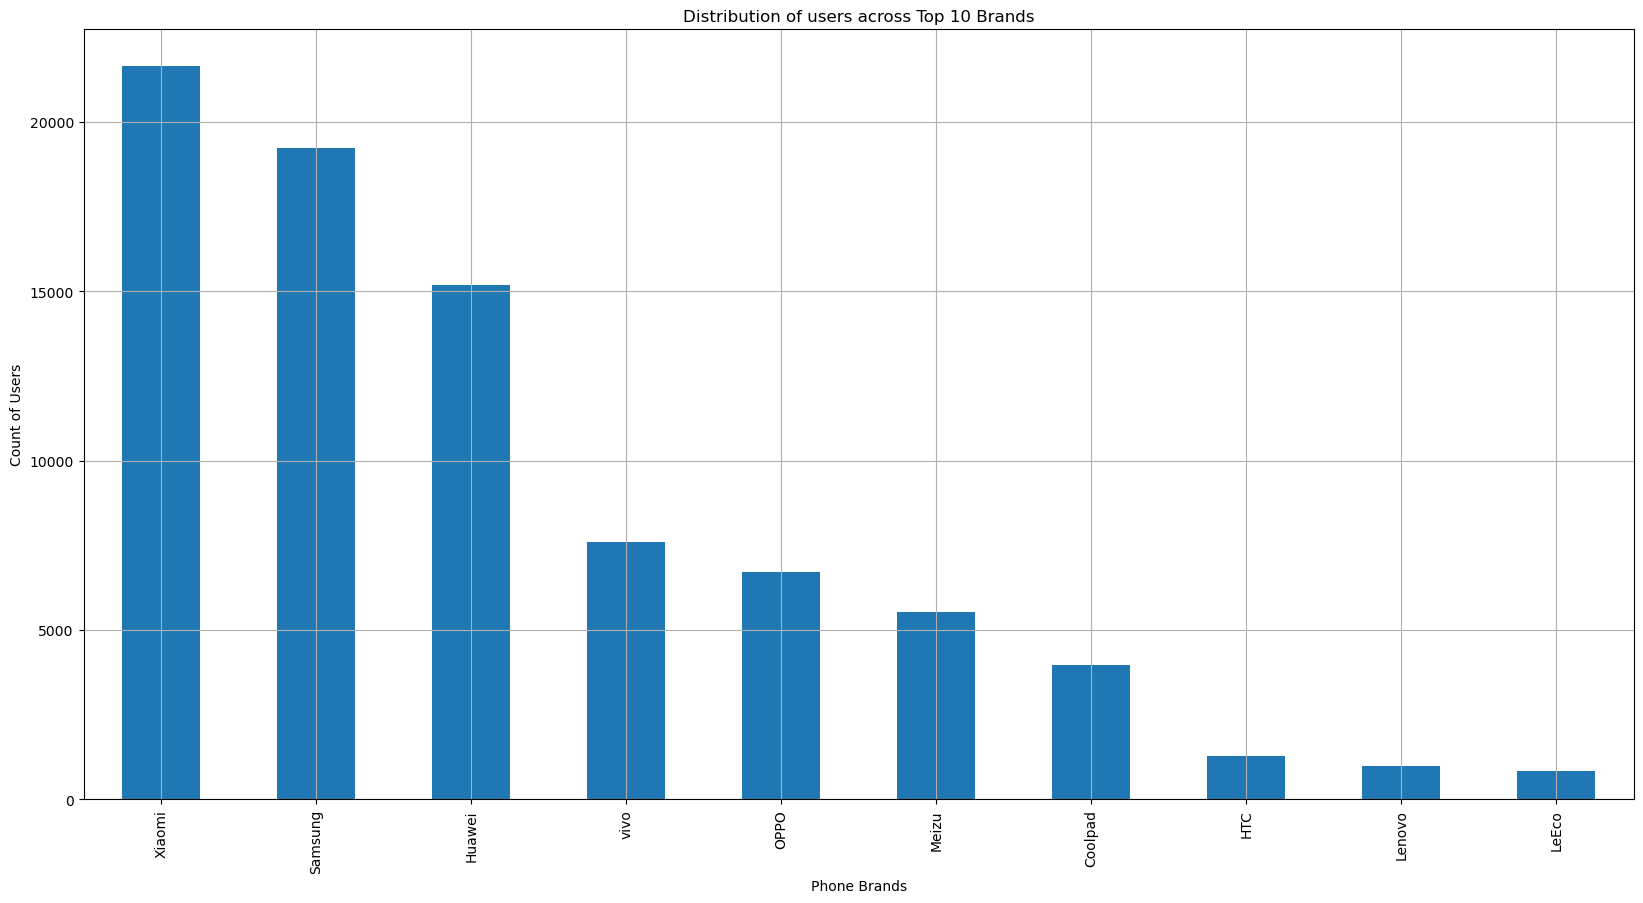

In [73]:
# method 1

plt.figure(figsize=(20,10))
distribution_of_Users_PhoneBrands[:10].plot(kind='bar', xlabel=('Phone Brands'), ylabel=('Count of Users'),
                                        title='Distribution of users across Top 10 Brands',
                                       grid= True)

### <font color=red>Obervations:</font>
<font color=green> Most of the Users are using <b>Xiaomi</b> brand phones and then Samsung, Huawei, Vivo, Oppo, Meizu, Coolpad, HTC, Lenovo, & LeEco
    

### <p style='text-align: center; color:blue'>3. Distribution of Users across Gender.

In [74]:
# check for duplicate values for device_id in gender_df

gender_df[gender_df.duplicated(['device_id'])]

,device_id,gender,age,group


### <font color=red>Obervations:</font>
<font color=green>There is no duplicate user</b>

In [75]:
gender_df

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31
...,...,...,...,...
74640,4682031842235089751,M,30,M29-31
74641,-9178703742877135986,M,30,M29-31
74642,180946546684162312,M,20,M22-
74643,1390702386071991851,M,37,M32-38


In [76]:
distribution_of_Users_gender=gender_df.groupby(['gender'])['device_id'].count().sort_values(ascending=False)
distribution_of_Users_gender

gender
M    47904
F    26741
Name: device_id, dtype: int64

<AxesSubplot: title={'center': 'Distribution of users across Gender'}, ylabel='device_id'>

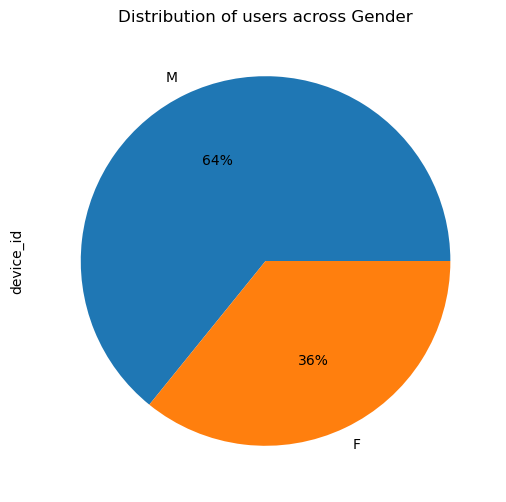

In [77]:
plt.figure(figsize=(10,6))
distribution_of_Users_gender.plot(kind='pie', autopct='%.0f%%' ,title='Distribution of users across Gender')

### <font color=red>Obervations:</font>
<font color=green>64% of the Users are Male</p>

### <p style='text-align: center; color:blue'>4. Distribution of Users across Age Segments.

In [78]:
distribution_of_Users_age=gender_df.groupby(['group'])['device_id'].count().sort_values(ascending=False)
distribution_of_Users_age

group
M23-26    9605
M32-38    9476
M39+      8581
M22-      7488
M29-31    7309
F33-42    5561
M27-28    5445
F23-      5050
F29-32    4628
F43+      4194
F24-26    4190
F27-28    3118
Name: device_id, dtype: int64

<AxesSubplot: title={'center': 'Distribution of Users across Age Segments'}, xlabel='Age Group', ylabel='Count of Users'>

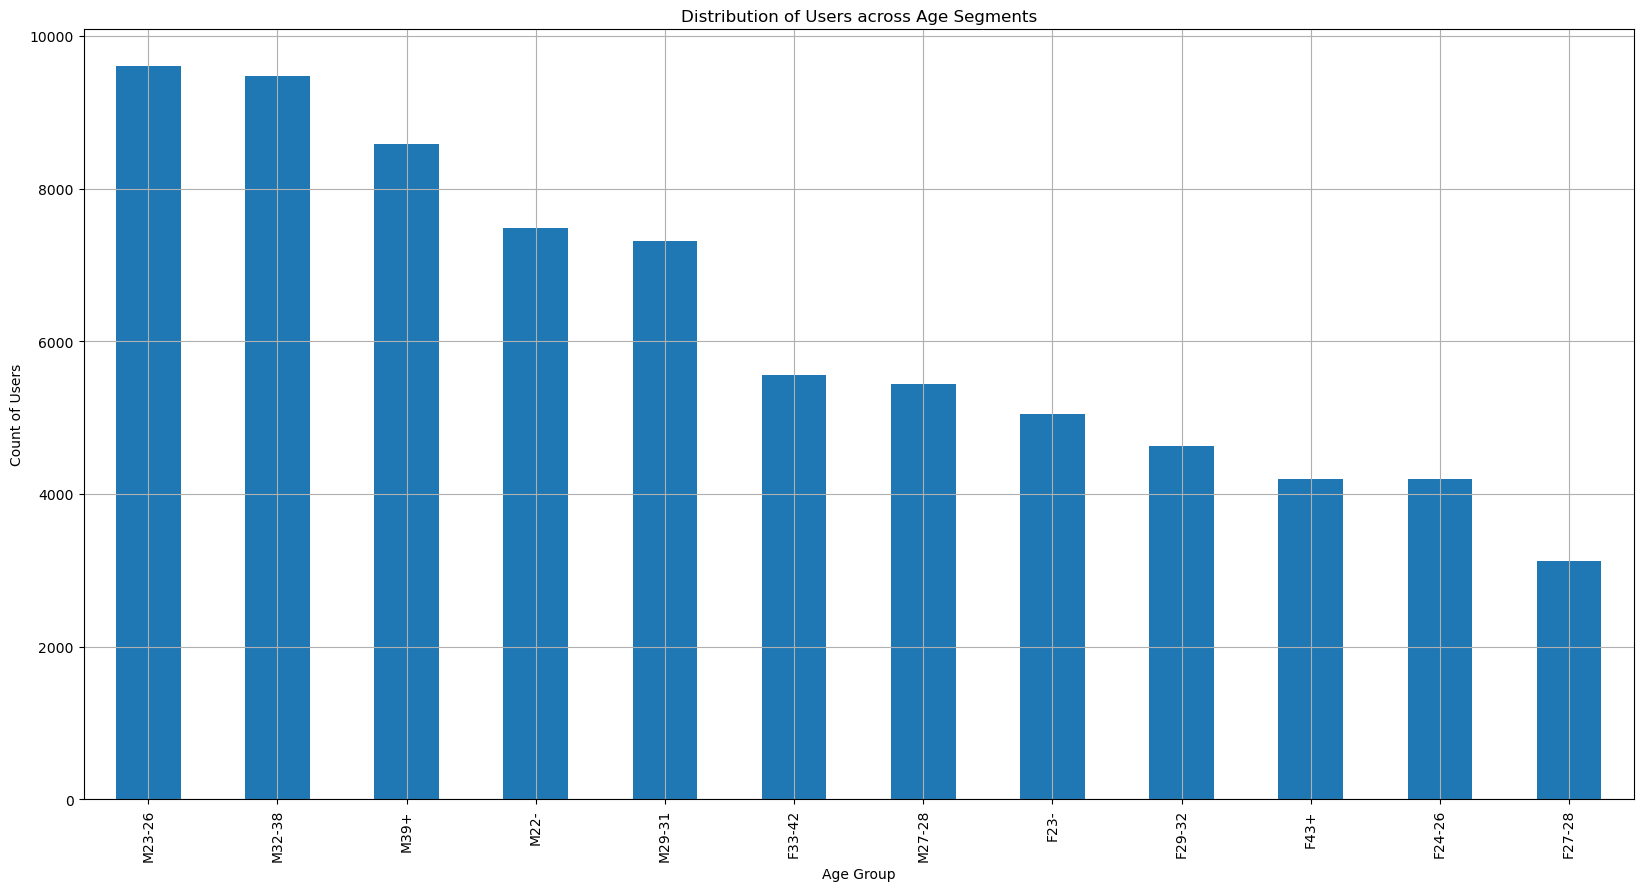

In [79]:
plt.figure(figsize=(20,10))
distribution_of_Users_age.plot(kind='bar', xlabel=('Age Group'), ylabel=('Count of Users'),
                                        title='Distribution of Users across Age Segments',
                                       grid= True)

### <font color=red>Obervations:</font>
<font color=green>Most of the Users are <b>Male</b> and <b> between age 23 to 26</b> age group.</p>

### <p style='text-align: center; color:blue'>5. Distribution of Phone Brands(Consider only the 10 Most used Phone Brands) for each Age Segment, State, and Gender

In [80]:
print(brand_df.shape)
print(new_eventsdf.shape)
print(gender_df.shape)

(87726, 3)
(60866, 7)
(74645, 4)


In [81]:
# need to combine New_eventsdf, Gender_df and Brand_df
# As per previous Obervations- Xiaomi, Samsung, Huawei, Vivo, Oppo, Meizu, Coolpad, HTC, Lenovo, & LeEco are 10 most phone brands 

merged_df=pd.merge(pd.merge(brand_df,gender_df, on=['device_id']),new_eventsdf, on=['device_id'])
merged_df

,device_id,phone_brand,device_model,gender,age,group,event_id,timestamp,longitude,latitude,city,state
0,-6552729385743211,vivo,X3T,M,28,M27-28,3078973,2016-05-07 21:41:38,78,17,Rajendranagar,AndhraPradesh
1,248228453883119456,Samsung,Galaxy Note 3,F,28,F27-28,1183695,2016-05-03 18:38:04,78,28,Jahangirabad,UttarPradesh
2,-333661782897496896,Samsung,A788t,F,24,F24-26,3180115,2016-05-03 19:13:01,78,10,Aruppukkottai,TamilNadu
3,8765877367300380672,Samsung,Galaxy Grand 2,F,32,F29-32,182668,2016-05-04 18:34:20,76,23,Indore,MadhyaPradesh
4,-18413620249632024,Xiaomi,红米,M,20,M22-,2631989,2016-05-01 03:14:21,91,24,Agartala,Tripura
...,...,...,...,...,...,...,...,...,...,...,...,...
401,3950345700644909,OPPO,R3,M,30,M29-31,2597274,2016-05-01 21:20:00,73,19,Mumbai,Maharashtra
402,25998715140835504,Samsung,A880,F,27,F27-28,1051892,2016-05-01 21:03:16,79,11,Thanjavur,TamilNadu
403,7121472058287854,亿通,P2,M,31,M29-31,3129686,2016-05-02 02:13:26,88,23,Calcutta,WestBengal
404,90982446876358976,Xiaomi,MI 2,M,31,M29-31,3086158,2016-05-04 02:16:48,79,28,Ujhani,UttarPradesh


In [82]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406 entries, 0 to 405
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   device_id     406 non-null    int64  
 1   phone_brand   406 non-null    object 
 2   device_model  406 non-null    object 
 3   gender        406 non-null    object 
 4   age           406 non-null    int64  
 5   group         406 non-null    object 
 6   event_id      406 non-null    int64  
 7   timestamp     406 non-null    object 
 8   longitude     406 non-null    float64
 9   latitude      406 non-null    float64
 10  city          406 non-null    object 
 11  state         406 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 41.2+ KB


In [83]:
merged_df.describe()

,device_id,age,event_id,longitude,latitude
count,406,406,406,406,406
mean,-156603402455871776,32,1717594,79,21
std,2076775661149950720,10,909467,5,6
min,-9086137694774886400,10,10266,70,9
25%,-244398878836912032,25,1040630,76,17
50%,-4545413875307347,30,1710687,78,21
75%,74910210858750992,36,2515286,80,25
max,8765877367300380672,79,3246808,94,34


In [84]:
merged_df[merged_df.duplicated()].count()

device_id       0
phone_brand     0
device_model    0
gender          0
age             0
group           0
event_id        0
timestamp       0
longitude       0
latitude        0
city            0
state           0
dtype: int64

### <font color=red>Obervations:</font>
<font color=green>
- After merging dataset, it has been observed that only 406 rows are found unique<br>
- Data Type seems OK except timestamp.<br>
- Min age is 10 and Max is 79, also data is normally distributed for Age.

In [85]:
merged_df.groupby(['phone_brand'])['group'].count()

phone_brand
Coolpad    16
HTC         9
Huawei     56
LG          1
LeEco       7
Lenovo      3
Meizu      30
OPPO       39
Samsung    98
Xiaomi     91
vivo       35
一加          1
中国移动        2
亿通          1
优米          1
努比亚         4
天语          1
宝捷讯         1
普耐尔         1
朵唯          1
波导          1
米歌          1
美图          1
酷比          3
酷比魔方        1
锤子          1
Name: group, dtype: int64

In [86]:
merged_df.groupby(['phone_brand'])['age'].count()

phone_brand
Coolpad    16
HTC         9
Huawei     56
LG          1
LeEco       7
Lenovo      3
Meizu      30
OPPO       39
Samsung    98
Xiaomi     91
vivo       35
一加          1
中国移动        2
亿通          1
优米          1
努比亚         4
天语          1
宝捷讯         1
普耐尔         1
朵唯          1
波导          1
米歌          1
美图          1
酷比          3
酷比魔方        1
锤子          1
Name: age, dtype: int64

In [87]:
# filtering the dataset with the 10 most phone brands i.e. "Xiaomi, Samsung, Huawei, Vivo, Oppo, Meizu, Coolpad, HTC, Lenovo, & LeEco"  

df=merged_df.query('phone_brand==("Xiaomi", "Samsung", "Huawei", "vivo", "OPPO", "Meizu", "Coolpad", "HTC", "Lenovo", "LeEco")')
df

,device_id,phone_brand,device_model,gender,age,group,event_id,timestamp,longitude,latitude,city,state
0,-6552729385743211,vivo,X3T,M,28,M27-28,3078973,2016-05-07 21:41:38,78,17,Rajendranagar,AndhraPradesh
1,248228453883119456,Samsung,Galaxy Note 3,F,28,F27-28,1183695,2016-05-03 18:38:04,78,28,Jahangirabad,UttarPradesh
2,-333661782897496896,Samsung,A788t,F,24,F24-26,3180115,2016-05-03 19:13:01,78,10,Aruppukkottai,TamilNadu
3,8765877367300380672,Samsung,Galaxy Grand 2,F,32,F29-32,182668,2016-05-04 18:34:20,76,23,Indore,MadhyaPradesh
4,-18413620249632024,Xiaomi,红米,M,20,M22-,2631989,2016-05-01 03:14:21,91,24,Agartala,Tripura
...,...,...,...,...,...,...,...,...,...,...,...,...
400,-1182611567903602176,OPPO,R3,M,30,M29-31,2298536,2016-05-07 20:44:27,73,19,Mumbai,Maharashtra
401,3950345700644909,OPPO,R3,M,30,M29-31,2597274,2016-05-01 21:20:00,73,19,Mumbai,Maharashtra
402,25998715140835504,Samsung,A880,F,27,F27-28,1051892,2016-05-01 21:03:16,79,11,Thanjavur,TamilNadu
404,90982446876358976,Xiaomi,MI 2,M,31,M29-31,3086158,2016-05-04 02:16:48,79,28,Ujhani,UttarPradesh


In [88]:
# distribution of phone brands across age
# sns.catplot(x='phone_brand', y='age', data=df, kind='bar', height=5, aspect=11.7/5)

# distribution of phone brands across age & gender
# sns.catplot(x='phone_brand', y='age', hue='gender', data=df, kind='bar', height=5, aspect=11.7/5)

# sns.catplot(x='phone_brand', y='age', data=df, kind='bar', row='state', col='gender',height=5, aspect=2)

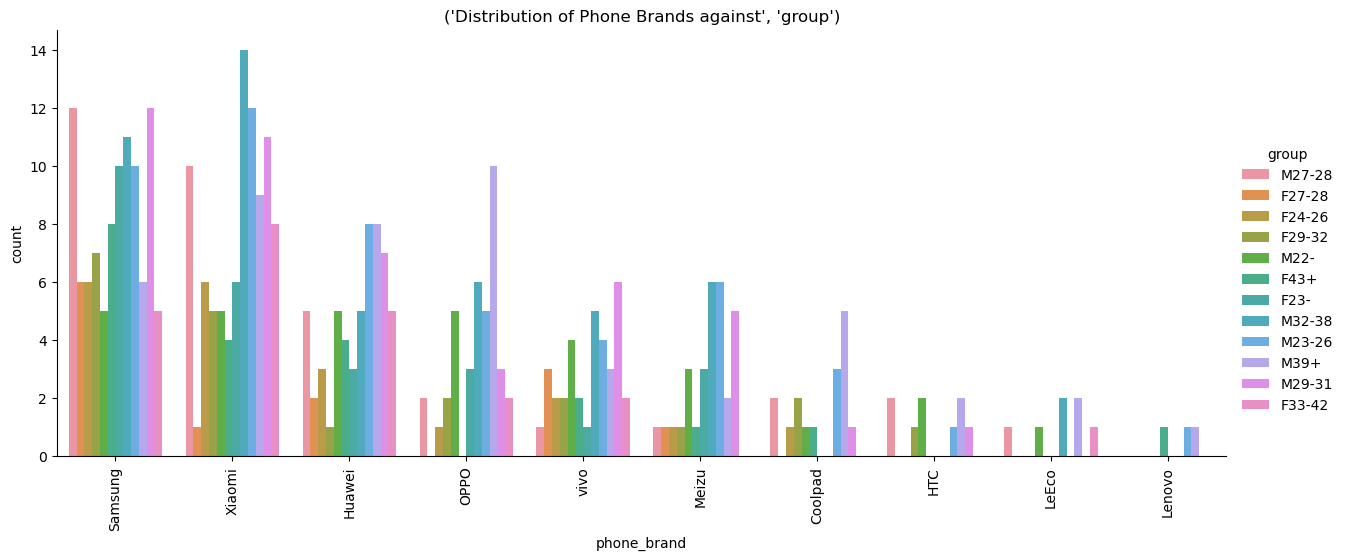

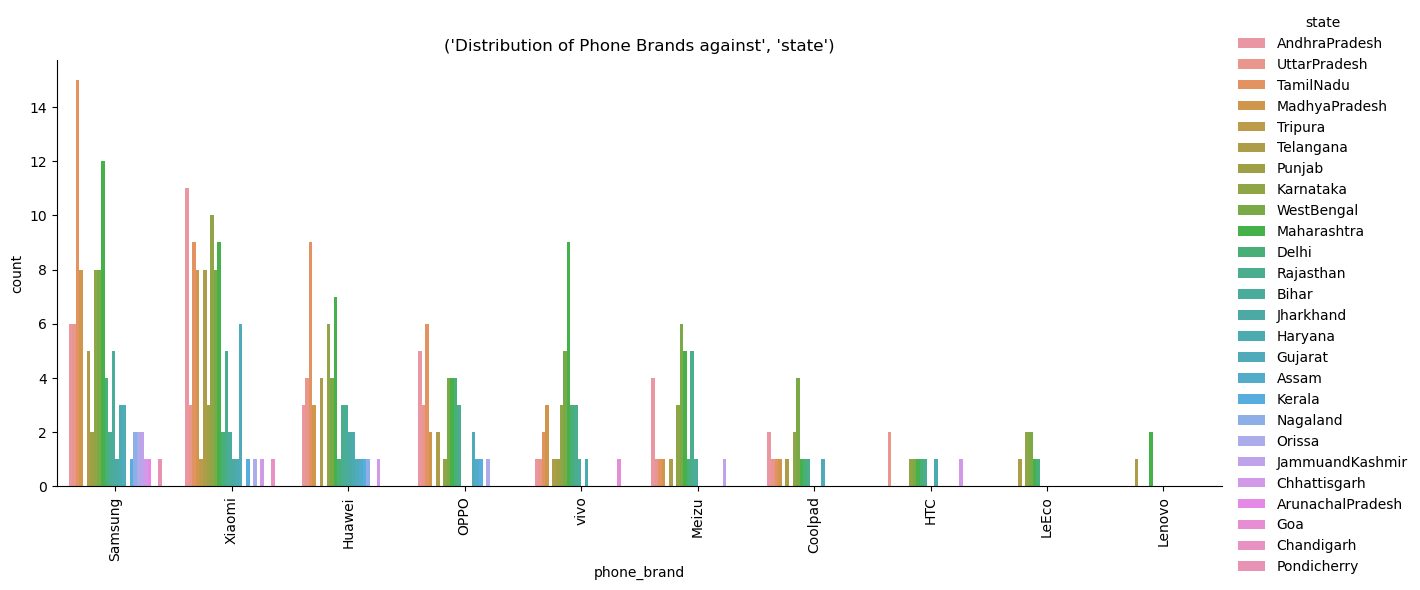

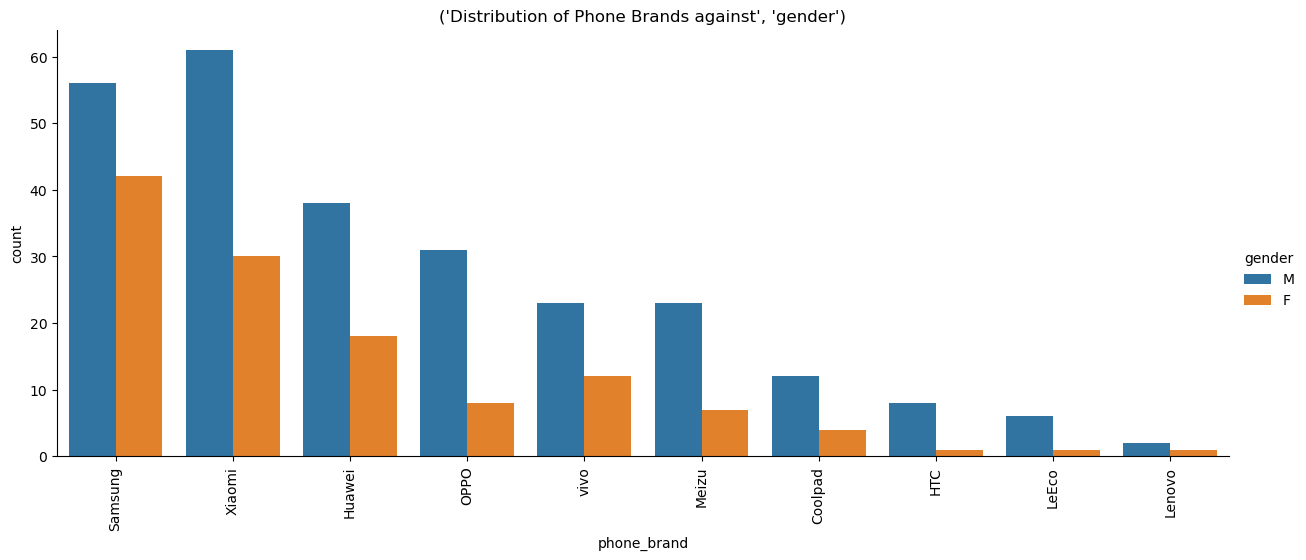

In [89]:
feature_q5=['group','state','gender']

for feature in feature_q5:
    t=('Distribution of Phone Brands against', feature)
    sns.catplot(x='phone_brand', data=df, kind='count', hue=feature, height=5, aspect=2.5, 
            order=['Samsung','Xiaomi','Huawei','OPPO','vivo','Meizu','Coolpad','HTC','LeEco','Lenovo'])
    plt.xticks(rotation=90)
    plt.title(t)
    plt.show()

### <font color=red>Obervations:</font>
<font color=green>
1. From the distribution against the age segment, we can observe Maximum users are using <b>Xiaomi</b> in age group of <b>M32-38</b><br>
2. Also we can observe, the least phone brand users are from <b>Lenovo</b>.</br>
3. From the distribution against the state, we can observe that <b>Samsung</b> brand is mostly used in <b>Uttapradesh.</b> and in <b>Pondicherry</b> it is less likely used.<br>
4. <b>Lenovo</b> has been used in only 2 States i.e. <b>Maharshtra</b> & <b>Tripura.</b><br>
5. From the distribution against the gender, we can observe that <b>Male's</b> preferred brand is <b>Xiaomi</b> and <b>Female's</b> preferred brand is <b>Samsung.</b><br>
6. <b>Lenovo</b> is the least famous brand between both gender.

### <p style='text-align: center; color:blue'>6. Distribution of Gender for each State, Age Segment and Phone Brand(Consider only the 10 Most used Phone Brands).

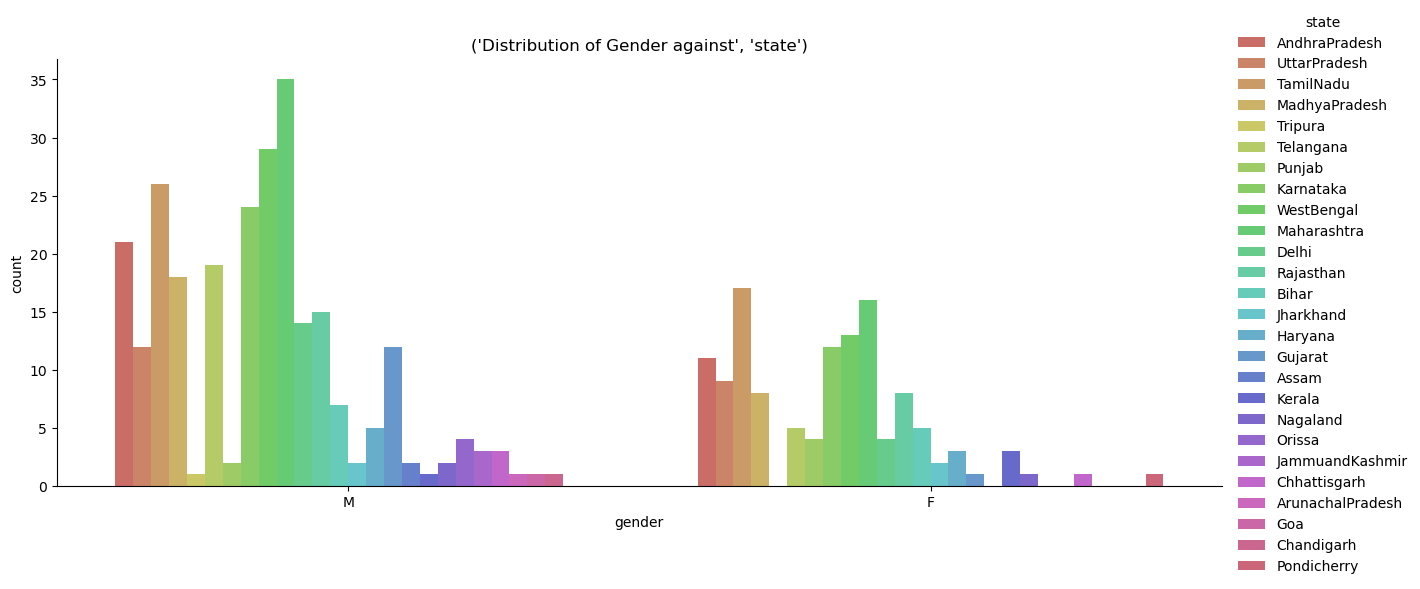

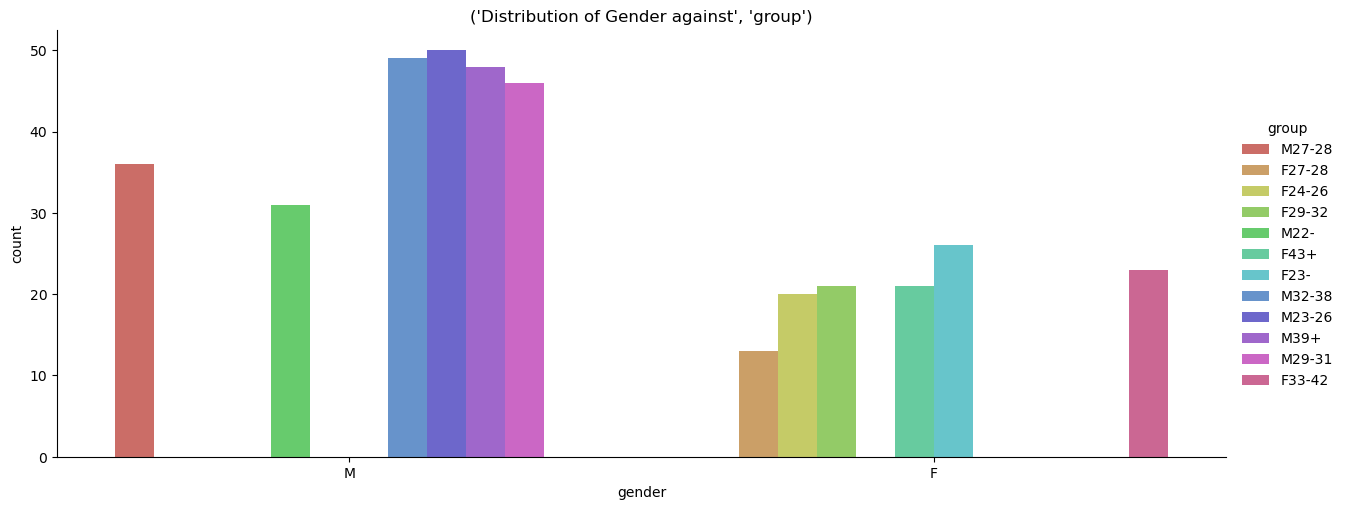

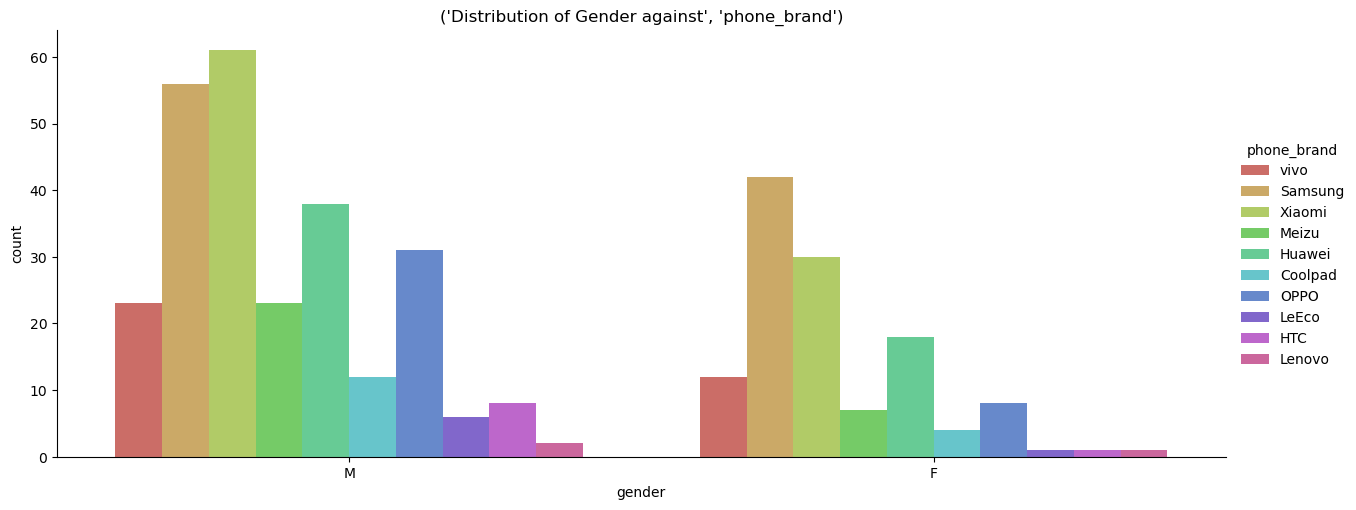

In [90]:
# sns.catplot(x='gender', y='age', data=df, kind='bar',col='gender', row='phone_brand',height=3, aspect=1.2)


feature_q6=['state','group','phone_brand']

for feature in feature_q6:
    t=('Distribution of Gender against', feature)
    sns.catplot(x='gender', data=df, kind='count', hue=feature, height=5, aspect=2.5, 
            order=['M','F'], palette='hls')
    plt.title(t)
    plt.show()

### <font color=red>Obervations:</font>
<font color=green>
    1. From the distribution Gender Vs state, we can observe Maximum <u>Female</u> users are from <b> Tamilnadu</b> and Maximum <u>Male</u> users are from  <b>Maharashtra.</b><br>
2. Also we can observe, in 7 states- Tripura, Assam, Orissa, Jammu&Kashmir, Chattisgarh, Goa & Chandigarh do not have Female users, whereas across all the states have Male users.</br>
3. From the distribution Gender Vs Age Segment, we can observe that maximum Female are from 'F23-' and Maximum Male users are from 'M23-26' group.

### <p style='text-align: center; color:blue'>7. Distribution of Age Segments for each State, Gender and Phone Brand(Consider only the 10 Most used Phone Brands).

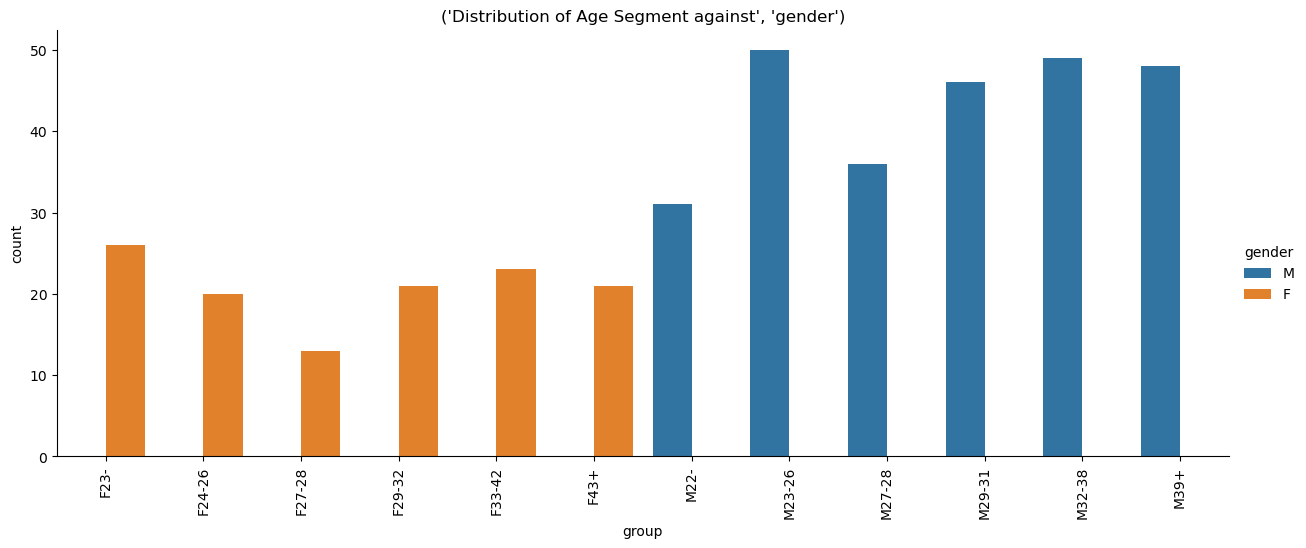

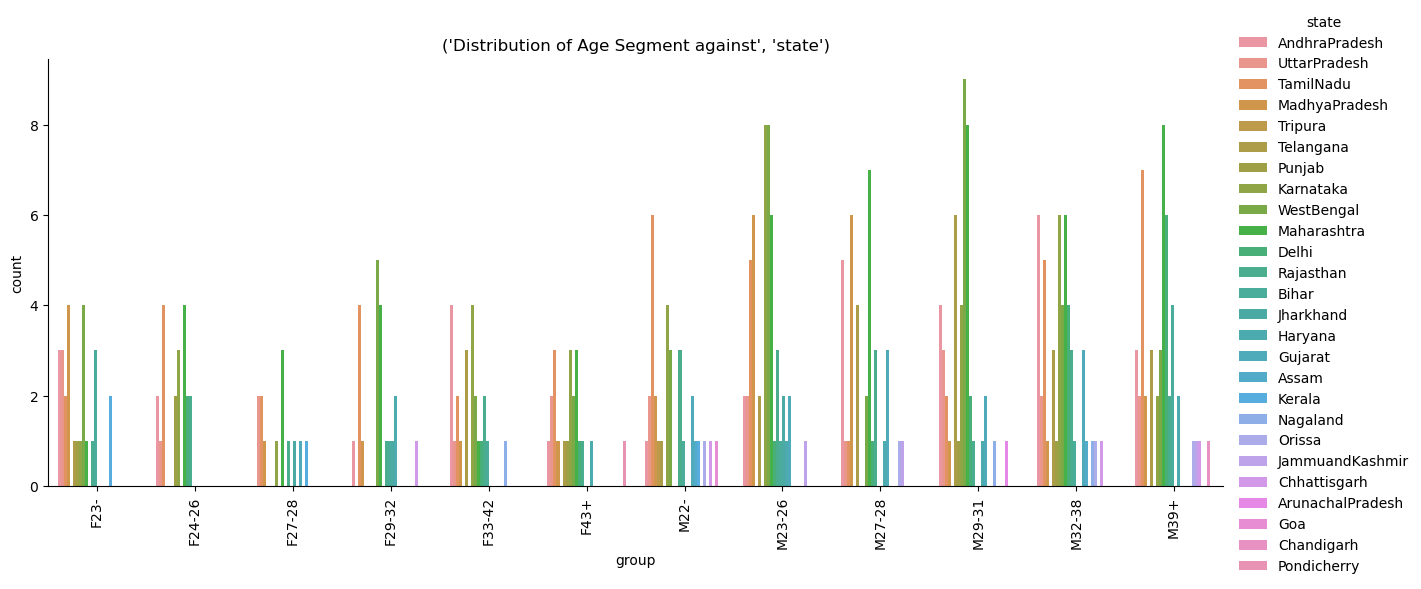

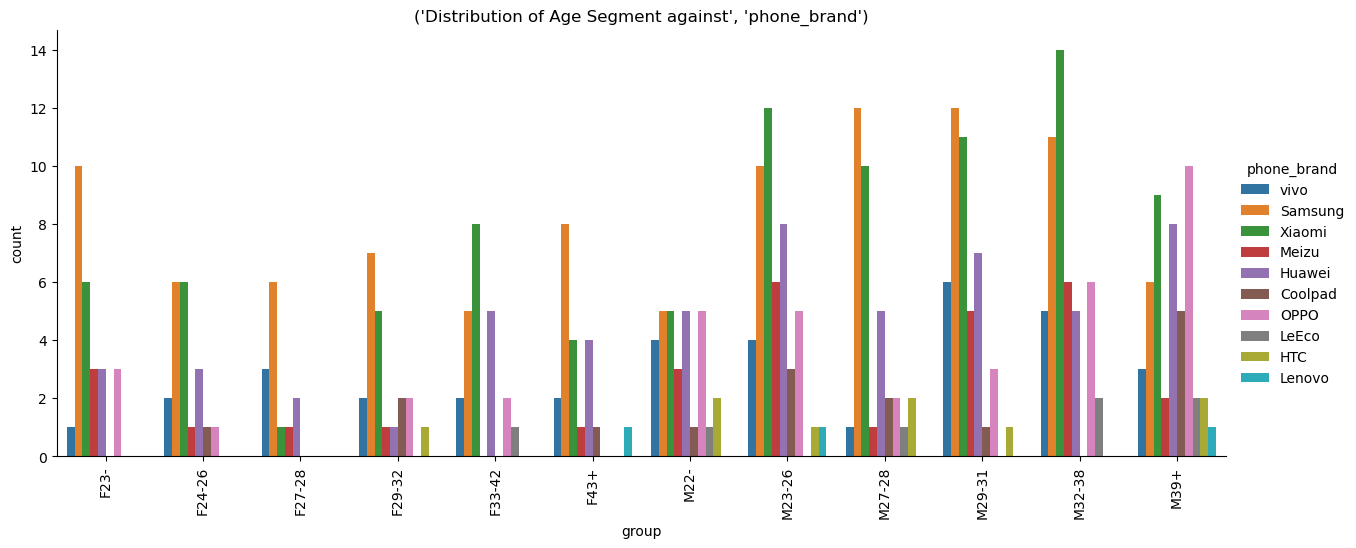

In [91]:
feature_q7=['gender', 'state', 'phone_brand']
sort=df.group.sort_values().unique()

for feature in feature_q7:
    t=('Distribution of Age Segment against', feature)
    sns.catplot(data=df, x='group', hue=feature, kind="count",height=5, aspect=2.5, order=sort)
    plt.xticks(rotation=90)
    plt.title(t)
    plt.show()

### <font color=red>Obervations:</font>
<font color=green>
    1. From the distribution Age Segment Vs Phone Brand, we can observe that <b>Group 'M39+'</b> are using almost all the10 most brands.<br>
    2. Among top most 10 brands, Age segment 'F27-28' are only least selected 5 brands. 

### <p style='text-align: center; color:blue'>8. Hourly distribution of Phone Calls.

In [92]:
from datetime import datetime as dt

In [93]:
events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   event_id   int64  
 1   device_id  float64
 2   timestamp  object 
 3   longitude  float64
 4   latitude   float64
 5   city       object 
 6   state      object 
dtypes: float64(3), int64(1), object(3)
memory usage: 173.7+ MB


In [94]:
events_df['Date_Time']=pd.to_datetime(events_df['timestamp'])

In [95]:
events_df

,event_id,device_id,timestamp,longitude,latitude,city,state,Date_Time
0,2765368,2973347786994914304,2016-05-07 22:52:05,77,29,Delhi,Delhi,2016-05-07 22:52:05
1,2955066,4734221357723754496,2016-05-01 20:44:16,88,23,Calcutta,WestBengal,2016-05-01 20:44:16
2,605968,-3264499652692492800,2016-05-02 14:23:04,77,29,Delhi,Delhi,2016-05-02 14:23:04
3,448114,5731369272434022400,2016-05-03 13:21:16,80,13,Chennai,TamilNadu,2016-05-03 13:21:16
4,665740,338888002570799936,2016-05-06 03:51:05,86,24,Bokaro,Jharkhand,2016-05-06 03:51:05
...,...,...,...,...,...,...,...,...
3252945,2687452,-1937027962234299136,2016-05-07 23:33:14,74,19,Pune,Maharashtra,2016-05-07 23:33:14
3252946,1051580,3345850694879477248,2016-05-03 05:13:30,73,19,Mumbai,Maharashtra,2016-05-03 05:13:30
3252947,1316227,-6406040271586684928,2016-05-01 16:03:28,77,29,Delhi,Delhi,2016-05-01 16:03:28
3252948,381262,-2920741109167081472,2016-05-05 17:22:36,83,18,Visakhapatnam,AndhraPradesh,2016-05-05 17:22:36


In [96]:
events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 8 columns):
 #   Column     Dtype         
---  ------     -----         
 0   event_id   int64         
 1   device_id  float64       
 2   timestamp  object        
 3   longitude  float64       
 4   latitude   float64       
 5   city       object        
 6   state      object        
 7   Date_Time  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 198.5+ MB


In [97]:
# events_df[(events_df['Date_Time'] > "2016-05-01") & (events_df['Date_Time'] < "2016-05-05")]

In [98]:
events_df['Hour']=events_df.Date_Time.dt.hour
events_df

,event_id,device_id,timestamp,longitude,latitude,city,state,Date_Time,Hour
0,2765368,2973347786994914304,2016-05-07 22:52:05,77,29,Delhi,Delhi,2016-05-07 22:52:05,22
1,2955066,4734221357723754496,2016-05-01 20:44:16,88,23,Calcutta,WestBengal,2016-05-01 20:44:16,20
2,605968,-3264499652692492800,2016-05-02 14:23:04,77,29,Delhi,Delhi,2016-05-02 14:23:04,14
3,448114,5731369272434022400,2016-05-03 13:21:16,80,13,Chennai,TamilNadu,2016-05-03 13:21:16,13
4,665740,338888002570799936,2016-05-06 03:51:05,86,24,Bokaro,Jharkhand,2016-05-06 03:51:05,3
...,...,...,...,...,...,...,...,...,...
3252945,2687452,-1937027962234299136,2016-05-07 23:33:14,74,19,Pune,Maharashtra,2016-05-07 23:33:14,23
3252946,1051580,3345850694879477248,2016-05-03 05:13:30,73,19,Mumbai,Maharashtra,2016-05-03 05:13:30,5
3252947,1316227,-6406040271586684928,2016-05-01 16:03:28,77,29,Delhi,Delhi,2016-05-01 16:03:28,16
3252948,381262,-2920741109167081472,2016-05-05 17:22:36,83,18,Visakhapatnam,AndhraPradesh,2016-05-05 17:22:36,17


In [99]:
# sns.histplot(events_df.Hour)

In [100]:
# sns.displot(events_df.Hour)

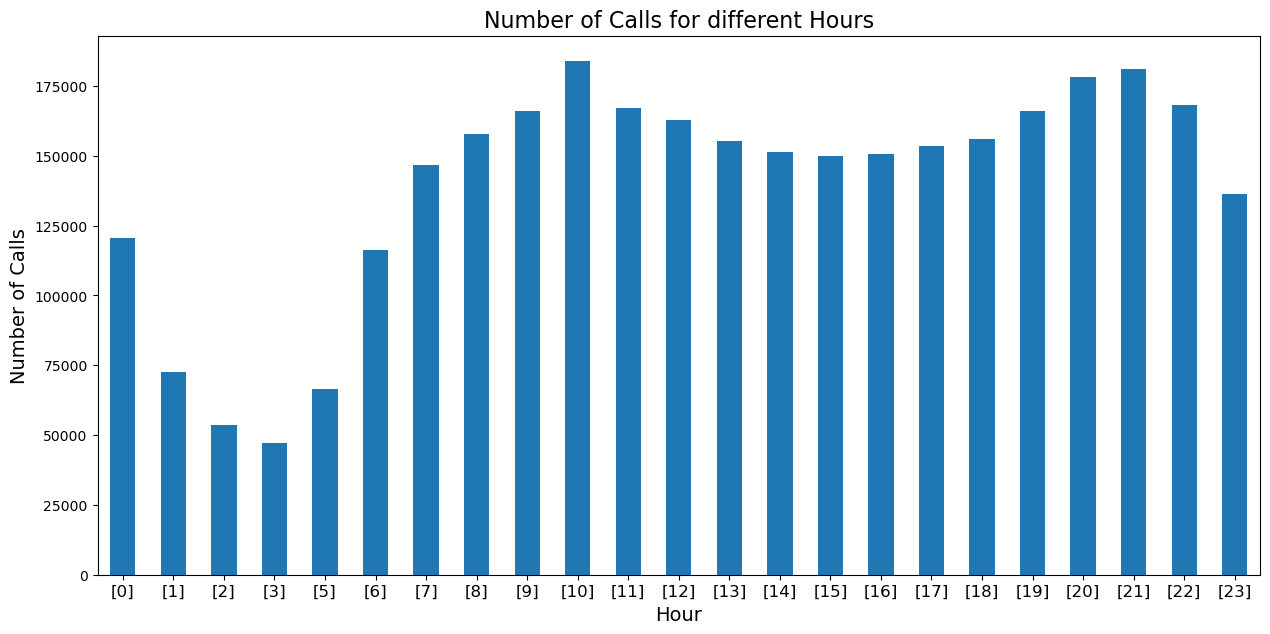

In [105]:
# Create a 15x7 inches figure
fig = plt.figure(figsize=(15,7))

# Create a bar plot
hour_data = events_df.groupby(['event_id'])['Hour'].unique()
hour_data.value_counts().iloc[:-1].sort_index().plot(kind='bar')

# Adding Cosmetics
plt.xlabel(xlabel='Hour', fontsize=14)
plt.ylabel(ylabel='Number of Calls', fontsize=14)
plt.title(label='Number of Calls for different Hours', fontsize=16)
plt.xticks(rotation='horizontal', fontsize=12)
#plt.xticks(labels=range(6, 21), rotation='horizontal', fontsize=12)
# plt.yticks(ticks=range(0, 4000, 500), fontsize=12)
# plt.grid(b=True)

# Displaying the plot
plt.show()

### <font color=red>Obervations:</font>
<font color=green>1. Maximum calls are happened between 8:00 AM and 10:00 PM<br>
2. Aroung 3:00 AM, there are least amount of calls are observed.

### <p style='text-align: center; color:blue'>9.Plot the Users on the Map using any suitable package.

In [103]:
merged_df

,device_id,phone_brand,device_model,gender,age,group,event_id,timestamp,longitude,latitude,city,state
0,-6552729385743211,vivo,X3T,M,28,M27-28,3078973,2016-05-07 21:41:38,78,17,Rajendranagar,AndhraPradesh
1,248228453883119456,Samsung,Galaxy Note 3,F,28,F27-28,1183695,2016-05-03 18:38:04,78,28,Jahangirabad,UttarPradesh
2,-333661782897496896,Samsung,A788t,F,24,F24-26,3180115,2016-05-03 19:13:01,78,10,Aruppukkottai,TamilNadu
3,8765877367300380672,Samsung,Galaxy Grand 2,F,32,F29-32,182668,2016-05-04 18:34:20,76,23,Indore,MadhyaPradesh
4,-18413620249632024,Xiaomi,红米,M,20,M22-,2631989,2016-05-01 03:14:21,91,24,Agartala,Tripura
...,...,...,...,...,...,...,...,...,...,...,...,...
401,3950345700644909,OPPO,R3,M,30,M29-31,2597274,2016-05-01 21:20:00,73,19,Mumbai,Maharashtra
402,25998715140835504,Samsung,A880,F,27,F27-28,1051892,2016-05-01 21:03:16,79,11,Thanjavur,TamilNadu
403,7121472058287854,亿通,P2,M,31,M29-31,3129686,2016-05-02 02:13:26,88,23,Calcutta,WestBengal
404,90982446876358976,Xiaomi,MI 2,M,31,M29-31,3086158,2016-05-04 02:16:48,79,28,Ujhani,UttarPradesh


In [104]:
plt_users = folium.Map(location=[merged_df['latitude'][0], merged_df['longitude'][0]], zoom_start=5)

for i, merged_df in merged_df.iterrows():
    popup=folium.Popup(merged_df['device_id'], max_width=1000)
    folium.Marker(location=[merged_df['latitude'],merged_df['longitude']],
                 popup=popup, icon=folium.Icon(icon="info-sign")).add_to(plt_users)
plt_users

<a name = Section9></a>

---
# <font color=blue>9. Summarization</font>
---

<a name = Section91></a>
### 9.1 <u>Conclusion</u>

- As per all the obsevations, we can conclude that Maharashtra have mot users of INSAID_Telecom comparatively other states.
- There are 22 states where no of users are less than 2000.
- There are 3 brands- <b>Samsung, Xiaomi & Huawei</b> which are most prefered by users each have more than 15000 users across country.
- Across brands Male users are more than Female users.
- For both genders, users are from young age group.
- There is consistent usage during daytime i.e. from 7:00 AM to 10:00 PM.

<a name = Section92></a>
### 9.2 <u>Actionable Insights</u>
- Need to maintai the services in Maharshtra to mainatin exisiting customers and to attarct new customers as well
- In those 22 states where the users are less than 2000, INSAID_Telecom needs to focus to increase customers base by improving marketing strategies & services etc.
- Other brands which are less prefered, need to provide best offers or discounts in respect of pricing & INSAID_Telecom branding etc.
- INSIAD_Telecom Improve the services for Female users by providing some specials offers.
- All phone brands needs to increase Female users by providing some specials offers and feminine centric speacil features or customisation etc.
- Lenovo should include their marketing strategy with INSAID_Telecom to improvde users across country.
- To increase usage during early morning hours (3:00 AM to 5:00 AM), INSAID to offer some freebies for users.